In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.graph_objects as go



import os 
import pprint
import joblib
import pickle


# For time series modeling
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error



/Users/katerynaisaieva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [3]:
def preprocess(data, nonfeatures=['unnamed: 0', 'dimension', 'calendardate', 'datekey', 'lastupdated']):
    # keep feature data only
    data.rename({'reportperiod':'date'}, inplace=True, axis=1)
    data.columns = [c.lower().strip() for c in data.columns]
    data.drop(nonfeatures, axis=1, inplace=True)
    data.drop(['ticker', 'accoci', 'assets', 'assetsavg', 'assetsc',
       'assetsnc', 'assetturnover', 'bvps', 'capex', 'cashneq',
       'cashnequsd', 'cor', 'consolinc', 'currentratio', 'de', 'debt',
       'debtc', 'debtnc', 'debtusd', 'deferredrev', 'depamor', 'deposits',
       'divyield', 'dps', 'ebit', 'ebitda','ebitdamargin', 'ebitdausd',
       'ebitusd', 'ebt', 'eps', 'epsdil', 'epsusd', 'equity', 'equityavg',
       'equityusd', 'ev', 'evebit', 'evebitda', 'fcf', 'fcfps', 'fxusd',
       'gp', 'grossmargin', 'intangibles', 'intexp', 'invcap',
       'invcapavg', 'inventory', 'investments', 'investmentsc',
       'investmentsnc', 'liabilities', 'liabilitiesc', 'liabilitiesnc',
       'marketcap', 'ncf', 'ncfbus', 'ncfcommon', 'ncfdebt', 'ncfdiv',
       'ncff', 'ncfi', 'ncfinv', 'ncfo', 'ncfx', 'netinc', 'netinccmn',
       'netinccmnusd', 'netincdis', 'netincnci', 'netmargin', 'opex',
       'opinc', 'payables', 'payoutratio', 'pb', 'pe', 'pe1', 'ppnenet',
       'prefdivis', 'price', 'ps', 'ps1', 'receivables', 'retearn',
       'revenue', 'revenueusd', 'rnd', 'roa', 'roe', 'roic', 'ros',
       'sbcomp', 'sgna', 'sharefactor', 'sharesbas', 'shareswa',
       'shareswadil', 'sps', 'tangibles', 'taxassets', 'taxexp',
       'taxliabilities', 'tbvps', 'workingcapital'], axis=1, inplace=True)
    data.columns = [ 'date','open', 'close', 'high', 'low', 'adj close', 'volume',  'rsi_6', 'bbands_6_h_ind',
       'bbands_6_l_ind', 'bbands_6hband', 'bbands_6lband', 'atr_6',
       'donchain_6hband', 'donchain_6lband', 'keltner_6_h_ind',
       'keltner_6_l_ind', 'stoch_6', 'cmf_6', 'sma_6', 'ema_6', 'obv',
       'vpt', 'adi', 'rsi_18', 'macd_f6_s18', 'bbands_18_h_ind',
       'bbands_18_l_ind', 'bbands_18hband', 'bbands_18lband', 'atr_18',
       'donchain_18hband', 'donchain_18lband', 'keltner_18_h_ind',
       'keltner_18_l_ind', 'stoch_18', 'cmf_18', 'sma_18',
       'sma_cross_f6_s18', 'ema_18', 'rsi_24', 'macd_f6_s24',
       'macd_f18_s24', 'bbands_24_h_ind', 'bbands_24_l_ind',
       'bbands_24hband', 'bbands_24lband', 'atr_24', 'donchain_24hband',
       'donchain_24lband', 'keltner_24_h_ind', 'keltner_24_l_ind',
       'stoch_24', 'cmf_24', 'ichi_conv_6_18_24', 'ichi_base_6_18_24',
       'ichi_diff_6_18_24', 'sma_24', 'sma_cross_f6_s24',
       'sma_cross_f18_s24', 'ema_24', 'rsi_30', 'macd_f6_s30',
       'macd_f18_s30', 'macd_f24_s30', 'bbands_30_h_ind',
       'bbands_30_l_ind', 'bbands_30hband', 'bbands_30lband', 'atr_30',
       'donchain_30hband', 'donchain_30lband', 'keltner_30_h_ind',
       'keltner_30_l_ind', 'stoch_30', 'cmf_30', 'ichi_conv_6_18_30',
       'ichi_base_6_18_30', 'ichi_diff_6_18_30', 'ichi_conv_6_24_30',
       'ichi_base_6_24_30', 'ichi_diff_6_24_30', 'ichi_conv_18_24_30',
       'ichi_base_18_24_30', 'ichi_diff_18_24_30', 'sma_30',
       'sma_cross_f6_s30', 'sma_cross_f18_s30', 'sma_cross_f24_s30',
       'ema_30', 'rsi_50', 'macd_f6_s50', 'macd_f18_s50', 'macd_f24_s50',
       'macd_f30_s50', 'bbands_50_h_ind', 'bbands_50_l_ind',
       'bbands_50hband', 'bbands_50lband', 'atr_50', 'donchain_50hband',
       'donchain_50lband', 'keltner_50_h_ind', 'keltner_50_l_ind',
       'stoch_50', 'cmf_50', 'ichi_conv_6_18_50', 'ichi_base_6_18_50',
       'ichi_diff_6_18_50', 'ichi_conv_6_24_50', 'ichi_base_6_24_50',
       'ichi_diff_6_24_50', 'ichi_conv_18_24_50', 'ichi_base_18_24_50',
       'ichi_diff_18_24_50', 'ichi_conv_6_30_50', 'ichi_base_6_30_50',
       'ichi_diff_6_30_50', 'ichi_conv_18_30_50', 'ichi_base_18_30_50',
       'ichi_diff_18_30_50', 'ichi_conv_24_30_50', 'ichi_base_24_30_50',
       'ichi_diff_24_30_50', 'sma_50', 'sma_cross_f6_s50',
       'sma_cross_f18_s50', 'sma_cross_f24_s50', 'sma_cross_f30_s50',
       'ema_50', 'rsi_100', 'macd_f6_s100', 'macd_f18_s100',
       'macd_f24_s100', 'macd_f30_s100', 'macd_f50_s100',
       'bbands_100_h_ind', 'bbands_100_l_ind', 'bbands_100hband',
       'bbands_100lband', 'atr_100', 'donchain_100hband',
       'donchain_100lband', 'keltner_100_h_ind', 'keltner_100_l_ind',
       'stoch_100', 'cmf_100', 'ichi_conv_6_18_100', 'ichi_base_6_18_100',
       'ichi_diff_6_18_100', 'ichi_conv_6_24_100', 'ichi_base_6_24_100',
       'ichi_diff_6_24_100', 'ichi_conv_18_24_100', 'ichi_base_18_24_100',
       'ichi_diff_18_24_100', 'ichi_conv_6_30_100', 'ichi_base_6_30_100',
       'ichi_diff_6_30_100', 'ichi_conv_18_30_100', 'ichi_base_18_30_100',
       'ichi_diff_18_30_100', 'ichi_conv_24_30_100',
       'ichi_base_24_30_100', 'ichi_diff_24_30_100', 'ichi_conv_6_50_100',
       'ichi_base_6_50_100', 'ichi_diff_6_50_100', 'ichi_conv_18_50_100',
       'ichi_base_18_50_100', 'ichi_diff_18_50_100',
       'ichi_conv_24_50_100', 'ichi_base_24_50_100',
       'ichi_diff_24_50_100', 'ichi_conv_30_50_100',
       'ichi_base_30_50_100', 'ichi_diff_30_50_100', 'sma_100',
       'sma_cross_f6_s100', 'sma_cross_f18_s100', 'sma_cross_f24_s100',
       'sma_cross_f30_s100', 'sma_cross_f50_s100', 'ema_100', 'rsi_200',
       'macd_f6_s200', 'macd_f18_s200', 'macd_f24_s200', 'macd_f30_s200',
       'macd_f50_s200', 'macd_f100_s200', 'bbands_200_h_ind',
       'bbands_200_l_ind', 'bbands_200hband', 'bbands_200lband',
       'atr_200', 'donchain_200hband', 'donchain_200lband',
       'keltner_200_h_ind', 'keltner_200_l_ind', 'stoch_200', 'cmf_200',
       'ichi_conv_6_18_200', 'ichi_base_6_18_200', 'ichi_diff_6_18_200',
       'ichi_conv_6_24_200', 'ichi_base_6_24_200', 'ichi_diff_6_24_200',
       'ichi_conv_18_24_200', 'ichi_base_18_24_200',
       'ichi_diff_18_24_200', 'ichi_conv_6_30_200', 'ichi_base_6_30_200',
       'ichi_diff_6_30_200', 'ichi_conv_18_30_200', 'ichi_base_18_30_200',
       'ichi_diff_18_30_200', 'ichi_conv_24_30_200',
       'ichi_base_24_30_200', 'ichi_diff_24_30_200', 'ichi_conv_6_50_200',
       'ichi_base_6_50_200', 'ichi_diff_6_50_200', 'ichi_conv_18_50_200',
       'ichi_base_18_50_200', 'ichi_diff_18_50_200',
       'ichi_conv_24_50_200', 'ichi_base_24_50_200',
       'ichi_diff_24_50_200', 'ichi_conv_30_50_200',
       'ichi_base_30_50_200', 'ichi_diff_30_50_200',
       'ichi_conv_6_100_200', 'ichi_base_6_100_200',
       'ichi_diff_6_100_200', 'ichi_conv_18_100_200',
       'ichi_base_18_100_200', 'ichi_diff_18_100_200',
       'ichi_conv_24_100_200', 'ichi_base_24_100_200',
       'ichi_diff_24_100_200', 'ichi_conv_30_100_200',
       'ichi_base_30_100_200', 'ichi_diff_30_100_200',
       'ichi_conv_50_100_200', 'ichi_base_50_100_200',
       'ichi_diff_50_100_200', 'sma_200', 'sma_cross_f6_s200',
       'sma_cross_f18_s200', 'sma_cross_f24_s200', 'sma_cross_f30_s200',
       'sma_cross_f50_s200', 'sma_cross_f100_s200', 'ema_200',
       '1_day_return', '1_day_log_return', '2_day_return',
       '2_day_log_return', '3_day_return', '3_day_log_return',
       '7_day_return', '7_day_log_return', '14_day_return',
       '14_day_log_return']
    
    return data

In [4]:
df = preprocess(pd.read_csv(f'../data/ticker_data/AAPL_full_data.csv'))
df = df.iloc[:,:6]
df.head(2)

,date,open,close,high,low,adj close
0,2011-09-26,14.280714,14.427857,13.975000,14.398929,12.329436
1,2011-09-27,14.597500,14.616071,14.216429,14.259286,12.209862


In [5]:
data = df.copy()

## Random Forest

In [7]:
data = data.set_index('date')
data.head(2)

,open,close,high,low,adj close
date,,,,,
2011-09-26,14.280714,14.427857,13.975000,14.398929,12.329436
2011-09-27,14.597500,14.616071,14.216429,14.259286,12.209862


In [8]:
index_split = int(len(data['adj close']) * 0.8), int(len(data['adj close']) * 0.2), int(len(data['adj close']) )
index_split

(2111, 527, 2639)

In [9]:
# lets split dataset into training and test sets and make the same procedure before training model

df_train = data[:2111]
df_test = data[2111:]

In [10]:
df_train_x = df_train[['open','close','high','low']]
df_train_y = df_train['adj close']

In [11]:
model = RandomForestRegressor()

#### Hyperparameter tuning

For a random forest regression model, the best parameters to consider are:
- n_estimators — number of trees in the forest
- max_depth — maximum depth in a tree
- min_samples_split — minimum number of data points before the sample is split
- min_samples_leaf — minimum number of leaf nodes that are required to be sampled
- bootstrap — sampling for data points, true or false
- random_state — generated random numbers for the random forest.


In [12]:
random_forest_grid = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator = model, 
                          param_distributions = random_forest_grid,
                          cv=3,
                          n_jobs=-1,
                          verbose=2, 
                          n_iter=200)

rscv_fit = rscv.fit(df_train_x,df_train_x)

best_parameters = rscv_fit.best_params_


Fitting 3 folds for each of 200 candidates, totalling 600 fits


In [13]:
print(best_parameters)

{'random_state': 30, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}


In [14]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=2, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=True)
rf_model.fit(df_train_x,df_train_y)
prediction = rf_model.predict(df_test[['open','close','high','low']])


In [15]:
predictions = pd.DataFrame({"predictions": prediction}, index= df_test.index)


In [16]:
predictions.shape, df_test.shape, df_train.shape

((528, 1), (528, 5), (2111, 5))

In [17]:
#predictions.index = pd.to_datetime(predictions.index)

In [18]:

fig = go.Figure()

fig.add_trace(go.Scatter(y=data['adj close'][:2111], x=data.index[:2111], name = 'training data'))
fig.add_trace(go.Scatter(y=data['adj close'][2111:], x=data.index[2111:], name = 'test data'))
fig.add_trace(go.Scatter(y= predictions.predictions, x=predictions.index, name = 'prediction RF'))





fig.update_layout(title = 'APPLE Price- adjusted close ($)', xaxis_title="date",
    yaxis_title="Stock price($)",
    
    
                )
fig.show()

In [19]:
predictions.shape, predictions.index.min(), predictions.index.max(),df_test.index.min(), df_test.index.max()

((528, 1), '2020-02-18', '2022-03-21', '2020-02-18', '2022-03-21')

<AxesSubplot:xlabel='date'>

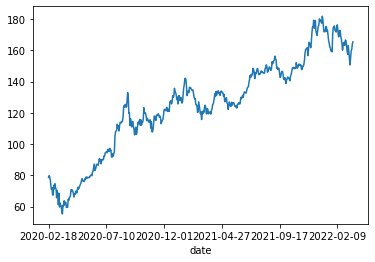

In [20]:
df_test['adj close'].plot()

<AxesSubplot:xlabel='date'>

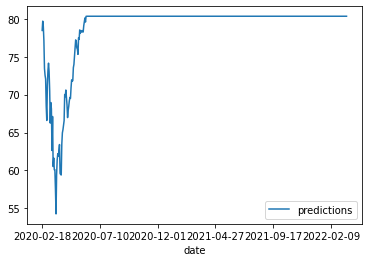

In [21]:
predictions.plot()

In [22]:
def calculate_results(y_pred, y_actual):
    
    results = {}
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = mean_squared_error(y_actual, y_pred, squared=False)
    mape = np.mean(np.abs(y_pred - y_actual)/np.abs(y_actual))
    
    n = np.array(y_actual.shape[0])
    d = np.abs(np.diff(np.array(y_actual))).sum()/(n-1)

    errors = np.abs(y_actual-y_pred)
    mase = errors.mean()/d
    
    accuracy = 100 - np.mean(mape)

    results['mse'] = mse
    results['mae'] = mae
    results['rmse'] = rmse
    results['mape'] = mape
    results['mase'] = mase
    #results['errors'] = errors
    results['accuracy'] = round(accuracy,2)
    
    
    return results

In [23]:
result = calculate_results(prediction, df_test['adj close'])
result

{'mse': 2903.540778869644,
 'mae': 45.950955521212585,
 'rmse': 53.88451334910285,
 'mape': 0.3275996682026424,
 'mase': 24.207711371516663,
 'accuracy': 99.67}

In [24]:
result_list = []
for i in result.items():
    result_list.append(f'{i[0]} : {i[1]}')
    
print(result_list)

['mse : 2903.540778869644', 'mae : 45.950955521212585', 'rmse : 53.88451334910285', 'mape : 0.3275996682026424', 'mase : 24.207711371516663', 'accuracy : 99.67']


In [25]:
rf_model.score(df_test[['open','close','high','low']], predictions)

1.0

In [26]:

predictions.to_csv("appl_forecast_random_forest.csv")

appl_oneyear_rf_forecast = pd.DataFrame(predictions[:252])
appl_oneyear_rf_forecast.to_csv("appl_oneyear_forecast_rf.csv")

appl_onemonth_rf_forecast = pd.DataFrame(predictions[:21])
appl_onemonth_rf_forecast.to_csv("appl_onemonth_forecast_rf.csv")

appl_sevendays_rf_forecast = pd.DataFrame(predictions[:5])
appl_sevendays_rf_forecast.to_csv("appl_sevendays_forecast_rf.csv")

In [27]:

# save the model to disk
filename = 'random_forest.joblib'
joblib.dump(rf_model, open(f'../models/'+filename, 'wb'))
 


In [28]:
# load the model from disk
# load, no need to initialize the loaded_rf
loaded_rf_model = joblib.load(f'../models/'+filename)

In [29]:
result = loaded_rf_model.score(df_test[['open','close','high','low']], predictions)
result

1.0

In [30]:
loaded_rf_model.predict(df_test[['open','close','high','low']])

array([78.46093762, 79.68800307, 78.96074789, 77.09659856, 73.4505546 ,
       72.55468053, 72.05927599, 68.49687527, 66.59513961, 71.20074055,
       73.16765775, 74.14817719, 73.01977743, 70.52022852, 66.25176037,
       68.95369341, 68.12624643, 62.63963324, 67.11740477, 60.52586745,
       61.65351008, 60.09162216, 60.11147581, 57.51783317, 54.27735204,
       59.47612097, 61.39838605, 62.20355384, 61.86935187, 62.58247921,
       63.42216176, 59.62370959, 59.47080133, 59.41318224, 63.49450409,
       64.96213635, 65.37601068, 65.92713696, 66.57336925, 70.01614631,
       69.73392488, 70.60808934, 69.67283513, 68.67429914, 66.97402347,
       67.89475962, 68.4434227 , 69.16948077, 69.62552134, 69.49586668,
       70.91531107, 71.94888017, 71.77387206, 71.84313215, 73.55511692,
       73.99466978, 74.98815529, 76.17151779, 77.21601546, 77.04925984,
       76.17592904, 75.96647064, 75.30670594, 77.50083159, 77.27982333,
       78.52603042, 78.09262562, 78.44519523, 78.27006046, 78.26

[CV] END bootstrap=False, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=500, random_state=2; total time=   1.9s
[CV] END bootstrap=False, max_depth=8, min_samples_leaf=9, min_samples_split=10, n_estimators=100, random_state=2; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=13, min_samples_split=2, n_estimators=1000, random_state=1; total time=   4.1s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=13, min_samples_split=10, n_estimators=50, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=8, min_samples_leaf=11, min_samples_split=2, n_estimators=50, random_state=1; total time=   0.3s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=11, min_samples_split=2, n_estimators=100, random_state=1; total time=   0.3s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=11, min_samples_split=2, n_estimators=100, random_state=1; total time=   0.3s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=11, min

[CV] END bootstrap=False, max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=1000, random_state=1; total time=   3.2s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, random_state=42; total time=   1.6s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=9, n_estimators=20, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=50, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=1, min_samples_leaf=9, min_samples_split=9, n_estimators=500, random_state=2; total time=   1.1s
[CV] END bootstrap=True, max_depth=9, min_samples_leaf=7, min_samples_split=9, n_estimators=500, random_state=42; total time=   2.6s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.3s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=3, min_sample

[CV] END bootstrap=False, max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=100, random_state=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=20, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=2; total time=   1.3s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=500, random_state=2; total time=   2.0s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=20, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=20, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=11, min_sample

[CV] END bootstrap=True, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=500, random_state=42; total time=   2.3s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, random_state=1; total time=   0.3s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=9, n_estimators=500, random_state=1; total time=   2.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, random_state=1; total time=   0.4s
[CV] END bootstrap=False, max_depth=11, min_samples_leaf=11, min_samples_split=9, n_estimators=1000, random_state=2; total time=   5.9s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=20, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20, random_state=1; total time=   0.1s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=11, min_sample

[CV] END bootstrap=False, max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=100, random_state=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=20, random_state=42; total time=   0.1s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=100, random_state=2; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=2; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=13, min_samples_split=2, n_estimators=1000, random_state=1; total time=   3.9s
[CV] END bootstrap=True, max_depth=9, min_samples_leaf=7, min_samples_split=9, n_estimators=500, random_state=42; total time=   2.5s
[CV] END bootstrap=True, max_depth=12, min_samples_leaf=7, min_sam